# Mineração Estatística de Dados:
# Projeto 1: Pré-processamento de dados e classificação

### Alunos
- Alexandre Batistellas Bellas&emsp;&emsp;&emsp;&nbsp;&emsp;9763168
- Juan Carlos Elias Obando Valdivia&emsp;&nbsp;7487156

## 1 –Considere a base de dados (arquivo dataset_5secondWindow%5B1%5D.csv):
## https://www.kaggle.com/fschwartzer/tmd-dataset-5-seconds-sliding-window

## 2 –Realize o pré-processamento dos dados: Verifque se há NaN ou outros erros no dados. Selecioneapenas os atributos relevantes e numéricos.

### Leitura e pre-processamento dos dados

Vamos ler o conjunto de dados:

In [2]:
import random
random.seed(1)
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#CSV file
features = pd.read_csv("data/dataset_5secondWindow%5B1%5D.csv", header=(0))
print(features.shape)
features.head(10)

(5893, 14)


,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car
5,559.0,9.330482,9.149029,9.520044,0.103857,0.000000,0.000000,0.000000,0.000000,57.361127,57.361127,57.361127,1.006611,Car
6,41.0,9.789771,9.758751,9.816197,0.013489,0.004100,0.002732,0.006579,0.001801,65.158369,65.158369,65.158369,0.000000,Train
7,20.0,9.906011,6.431646,14.202603,1.044684,0.140902,0.006567,0.690414,0.119667,0.000000,0.000000,0.000000,0.000000,Bus
8,35.0,9.639711,8.996134,10.027802,0.255053,0.041554,0.008014,0.123026,0.030074,89.808441,89.808441,89.808441,0.010171,Bus
9,27.0,9.602109,9.014786,10.068528,0.267791,0.037451,0.007174,0.084820,0.021391,89.815738,89.815738,89.815738,0.004995,Train


Primeiramente, vamos remover os "NaN" do arquivo, apagando as linhas que contém esse problema:

In [3]:
features = features.dropna()
print(features.shape)

(5893, 14)


Vamos remover as linhas duplicadas:

In [4]:
features.duplicated()
features = features.drop_duplicates()
print(features.shape)

(5893, 14)


Vamos remover as linhas com "?" ou qualquer outro caracter que indique um erro ou entrada faltante.
Primeiramente, convertemos essas entradas para "NaN":

In [5]:
features = features.replace('?', np.nan)
features = features.dropna()
print(features.shape)

(5893, 14)


In [6]:
classes = pd.unique(features[features.columns[-1]]) #name of the classes
classes = np.array(classes, dtype=str) #convert on array
print("Classes únicas no conjunto de dados:", classes)
list_labels = list(features.columns)
print("\nNomes dos atributos e classe:",list_labels)

Classes únicas no conjunto de dados: ['Still' 'Car' 'Train' 'Bus' 'Walking']

Nomes dos atributos e classe: ['time', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'sound#mean', 'sound#min', 'sound#max', 'sound#std', 'target']


Vamos construir as variáveis X e Y, sendo que o processo classificação se resume em estimar a função f na relação Y=f(X)+ϵ, onde ϵ é o erro, que tem distribuição normal com média igual a zero e variância σ^2.

In [7]:
Y = np.array(features[list_labels[-1]], dtype=str)
#Convert to numpy array
X = np.array(features)
#Remove the labels from the features
#axis 1 refers to the columns
features = features.drop(list_labels[-1], axis = 1)
#Remove feature time
features = features.drop(list_labels[0], axis = 1)
features.head(10)

,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std
0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000
1,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013
2,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000
3,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186
4,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389
5,9.330482,9.149029,9.520044,0.103857,0.000000,0.000000,0.000000,0.000000,57.361127,57.361127,57.361127,1.006611
6,9.789771,9.758751,9.816197,0.013489,0.004100,0.002732,0.006579,0.001801,65.158369,65.158369,65.158369,0.000000
7,9.906011,6.431646,14.202603,1.044684,0.140902,0.006567,0.690414,0.119667,0.000000,0.000000,0.000000,0.000000
8,9.639711,8.996134,10.027802,0.255053,0.041554,0.008014,0.123026,0.030074,89.808441,89.808441,89.808441,0.010171
9,9.602109,9.014786,10.068528,0.267791,0.037451,0.007174,0.084820,0.021391,89.815738,89.815738,89.815738,0.004995


Verificando o balanceamento das classes:

In [8]:
cl = np.unique(Y)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = Y == cl[i]
    ncl[i] = len(Y[a])
print(ncl)

[1178. 1180. 1179. 1179. 1177.]


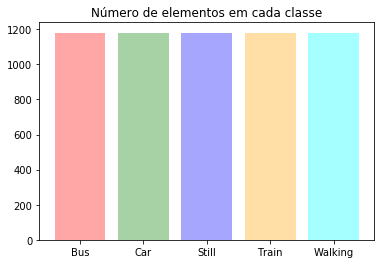

In [9]:
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl, alpha=.35, color=['red', 'green', 'blue', 'orange', 'cyan'])
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

In [10]:
#Saving feature names for later use
feature_list = list(features.columns)
print(feature_list)

['android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'sound#mean', 'sound#min', 'sound#max', 'sound#std']


In [11]:
#Convert to numpy array
X = np.array(features)

### Conjuntos de teste e treinamento

Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [12]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.7
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)

A partir desses dados, podemos realizar o processo de classificação.

## 3  -No caso do classificador Knn, verifique o efeito do parâmetro k na classificação.


### k-vizinhos

Podemos realizar a classificação usando a biblioteca scikit-learn (https://scikit-learn.org). As métricas possíveis podem ser vistas em: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

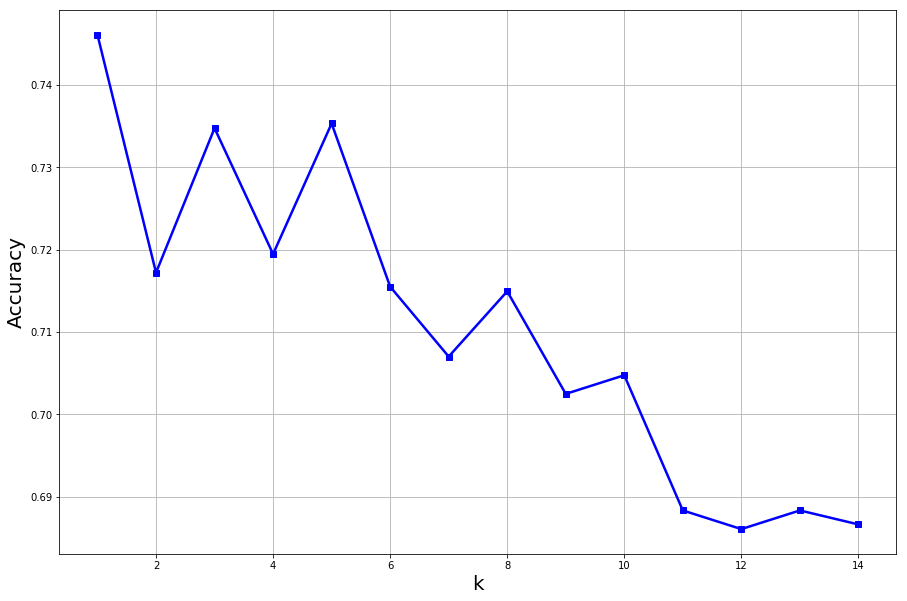

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

vscore = []
vk = []
for k in np.arange(1, 15):
    model = KNeighborsClassifier(n_neighbors=k)
    # Train the model using the training sets
    model.fit(train_x,train_y)
    #Predict Output
    pred_y= model.predict(test_x)
    score = accuracy_score(pred_y, test_y)
    vscore.append(score)
    vk.append(k)
plt.figure(figsize=(15,10))
plt.plot(vk, vscore, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("k", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(True)
plt.show(True)

## 4 – Compare	os	classificadores:
- ### knn (melhor	k	observado	no	item	anterior)
- ### Decisão	Bayesiana
- ### Naive	Bayes

### Classificador Bayesiano

Vamos considerar o caso paramétrico, assumindo que cada variável está distribuída de acordo com uma distribuição Normal.

Já selecionamos os conjuntos de treinamento e teste. No conjunto de treinamento, vamos calcular a média e desvio padrão de cada atributo para cada classe. A seguir, reaizamos a classificação, dos dados usando a teoria da decisão Bayesiana, isto é: X∈Ci se, e somente se, P(Ci|X)=maxP(Cj|X) para todo j.

In [14]:
from scipy.stats import multivariate_normal
#matrix to store the probabilities
P = pd.DataFrame(data=np.zeros((train_x.shape[0], len(classes))), columns= classes)

In [15]:
for i in np.arange(0, len(classes)):
    #elements tem todos os identificadores dos exemplos do conjunto de treinamento cujo rótulo é classe[i] 
    elements = tuple(np.where(train_y == classes[i]))
    #Z contém todos os exemplos do conjunto de treinamento cujo rótulo é classe[i]
    Z = train_x[elements,:][0]
    #calcula a média por coluna(axis = 0)
    m = np.mean(Z, axis = 0)
    #calcula a covariancia da transposta de Z
    cv = np.cov(np.transpose(Z))
    #para cada exemplo do conjunto de teste
    for j in np.arange(0, test_x.shape[0]):
        #pega cada exemplo do conjunto de teste(todos os atributos)
        x = test_x[j,:]
        # probability density function for multivariate_normal is
        #f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right),
        pj = multivariate_normal.pdf(x, mean=m, cov=cv)
        P[classes[i]][j] = pj

In [16]:
pred_y = []
#np.array(test_x.shape[0], dtype=str)
#para cada exemplo do conjunto de teste 
for i in np.arange(0, test_x.shape[0]):
    #pegar o identificador da coluna com maior probabilidade de cada exemplo
    c = np.argmax(np.array(P.iloc[[i]]))
    pred_y.append(classes[c])
pred_y = np.array(pred_y, dtype=str)

In [17]:
from sklearn.metrics import accuracy_score
score_bayes = accuracy_score(pred_y, test_y)

## Naive Bayes

Vamos considerar a biblioteca scikit-learn.

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
pred_y = gnb.predict(test_x)
score_GNB = accuracy_score(pred_y, test_y)

A matriz de confusão:

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y, pred_y))

[[ 69  73  29 123  14]
 [ 21 118  39 164  14]
 [  7   6 191 165  11]
 [  8  14  38 275   6]
 [ 26  18   6  29 304]]


In [21]:
print("Acurácias:\n")
print("\tKNN para k = 1: \t\t%.4f" % vscore[0])
print("\tDecisão Bayesiana: \t\t%.4f" % score_bayes)
print("\tNaive Bayes: \t\t\t%.4f"% score_GNB)

Acurácias:

	KNN para k = 1: 		0.7460
	Decisão Bayesiana: 		0.5950
	Naive Bayes: 			0.5413


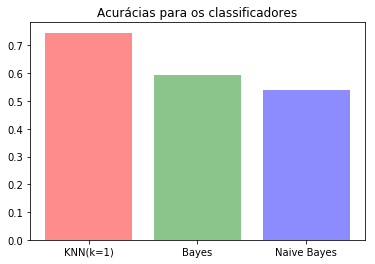

In [22]:
acur_aux = [vscore[0], score_bayes, score_GNB]
numbers = np.arange(0, len(acur_aux))
plt.bar(numbers, acur_aux, alpha=.45, color=['red', 'green', 'blue'])
classificadores = ['KNN(k=1)', 'Bayes', 'Naive Bayes']
plt.xticks(numbers, classificadores)
plt.title('Acurácias para os classificadores')
plt.show(True)

É possível concluir que o algoritmo KNN, para k = 1 vizinhos, teve maior acurácia entre os algoritmos analisados.

## 5 – Verifique	o	efeito	da	normalização	(atributos	em	[0,1])	e	padronização (atributos	com	média	0	e	variância	1)	dos	dados.	Compare	os	casos	sem	processamento,	com	padronização	e	com	normalização	para	os	classificadores:
- ### knn	(melhor	k	observado	no	item	anterior)
- ### Decisão	Bayesiana
- ### Naive	Bayes

In [23]:
#Bibliotecas para normalização e padronização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### k-vizinhos

In [24]:
def acuraciaKnnValor(features, tipo=0, p=0.7, metric='euclidean', k=1, dist=2): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    
    X = np.array(features, dtype=float)
    #se quisermos a acurácia com padronização 
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização"
        
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    
    model = KNeighborsClassifier(n_neighbors=k, p=dist, metric=metric)
    # Train the model using the training sets
    model.fit(train_x,train_y)
    #Predict Output
    pred_y = model.predict(test_x) 
    score = accuracy_score(pred_y, test_y)
    return score

print('Acurácia sem processamento:\t', acuraciaKnnValor(features, tipo=0))
print('Acurácia com padronização:\t', acuraciaKnnValor(features, tipo=1))
print('Acurácia com normalização:\t',acuraciaKnnValor(features, tipo=2))

Acurácia sem processamento:	 0.7460407239819005
Acurácia com padronização:	 0.793552036199095
Acurácia com normalização:	 0.7743212669683258


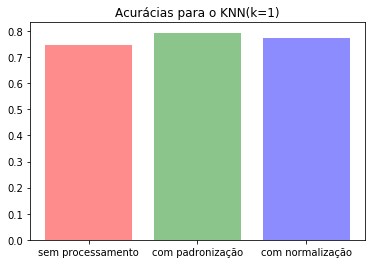

In [25]:
acur_aux = [acuraciaKnnValor(features, tipo=0), acuraciaKnnValor(features, tipo=1), acuraciaKnnValor(features, tipo=2)]
numbers = np.arange(0, len(acur_aux))
plt.bar(numbers, acur_aux, alpha=.45, color=['red', 'green', 'blue'])
classificadores = ['sem processamento', 'com padronização', 'com normalização']
plt.xticks(numbers, classificadores)
plt.title('Acurácias para o KNN(k=1)')
plt.show(True)

### Classificador Bayesiano

In [26]:
def acuraciaBayesValor(features, tipo=0, p=0.7): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    X = np.array(features, dtype=float)
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização"
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    P = pd.DataFrame(data=np.zeros((test_x.shape[0], len(classes))), columns = classes)
    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(train_y == classes[i]))
        Z = train_x[elements,:][0]
        m = np.mean(Z, axis = 0)
        cv = np.cov(np.transpose(Z))
        for j in np.arange(0,test_x.shape[0]):
            x = test_x[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv)
            P[classes[i]][j] = pj
    
    pred_y = []
    for i in np.arange(0, test_x.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        pred_y.append(classes[c])
    pred_y = np.array(pred_y, dtype=str)
    
    score = accuracy_score(pred_y, test_y)
    return score

print('Acurácia sem processamento:\t', acuraciaBayesValor(features, tipo=0))
print('Acurácia com padronização:\t', acuraciaBayesValor(features, tipo=1))
print('Acurácia com normalização:\t', acuraciaBayesValor(features, tipo=2))


Acurácia sem processamento:	 0.5950226244343891
Acurácia com padronização:	 0.5950226244343891
Acurácia com normalização:	 0.5950226244343891


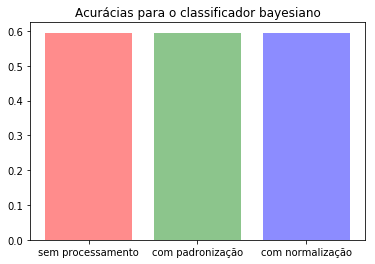

In [27]:
acur_aux = [acuraciaBayesValor(features, tipo=0), acuraciaBayesValor(features, tipo=1), acuraciaBayesValor(features, tipo=2)]
numbers = np.arange(0, len(acur_aux))
plt.bar(numbers, acur_aux, alpha=.45, color=['red', 'green', 'blue'])
classificadores = ['sem processamento', 'com padronização', 'com normalização']
plt.xticks(numbers, classificadores)
plt.title('Acurácias para o classificador bayesiano')
plt.show(True)

### Naive Bayes

In [28]:
def acuraciaNaiveBayesValor(features, tipo=0, p=0.7): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    
    X = np.array(features, dtype=float)
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização" 
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    gnb = GaussianNB()
    gnb.fit(train_x, train_y)
    
    pred_y = gnb.predict(test_x)
    score = accuracy_score(pred_y, test_y)
    return score

print('Acurácia sem processamento:\t', acuraciaNaiveBayesValor(features, tipo=0))
print('Acurácia com padronização:\t', acuraciaNaiveBayesValor(features, tipo=1))
print('Acurácia com normalização:\t', acuraciaNaiveBayesValor(features, tipo=2))

Acurácia sem processamento:	 0.541289592760181
Acurácia com padronização:	 0.541289592760181
Acurácia com normalização:	 0.541289592760181


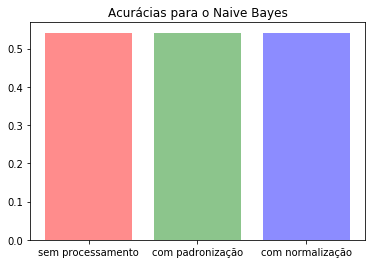

In [29]:
acur_aux = [acuraciaNaiveBayesValor(features, tipo=0), acuraciaNaiveBayesValor(features, tipo=1), acuraciaNaiveBayesValor(features, tipo=2)]
numbers = np.arange(0, len(acur_aux))
plt.bar(numbers, acur_aux, alpha=.45, color=['red', 'green', 'blue'])
classificadores = ['sem processamento', 'com padronização', 'com normalização']
plt.xticks(numbers, classificadores)
plt.title('Acurácias para o Naive Bayes')
plt.show(True)

## 6 –Mostre a matriz de correlação entre os atributos. Considere os atributos com menor correlação (por exemplo, menor do que 0.5). Realize a classificação novamente apenas com esses atributos. A acurácia melhora?

A matriz de correlação entre as variáveis:

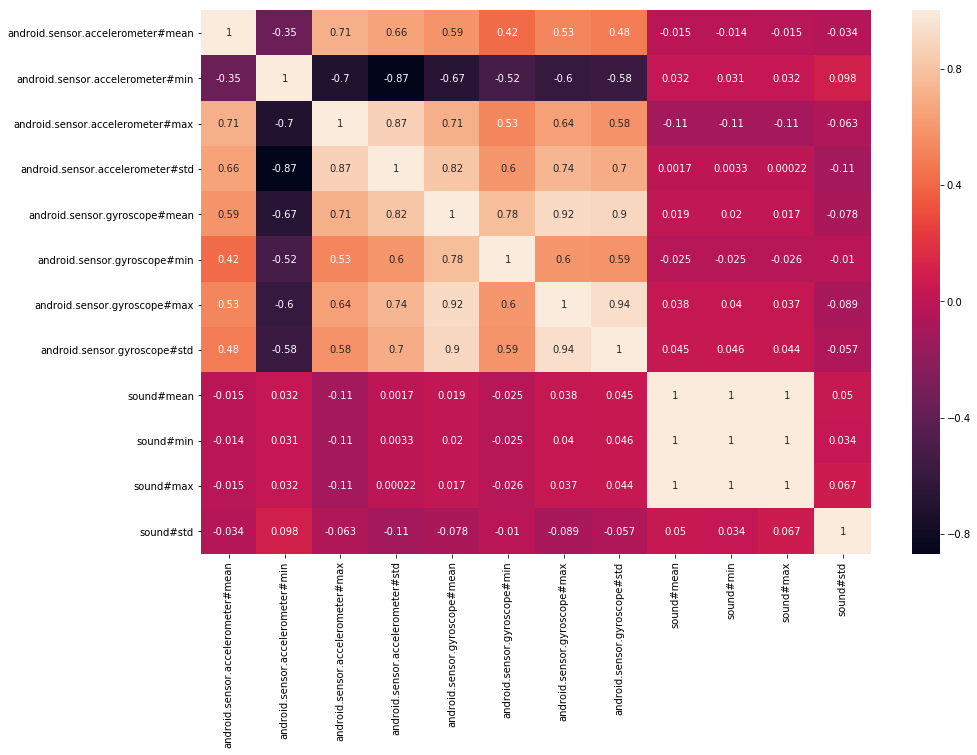

In [30]:
import seaborn as sns

corr = features.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

Assim, para identificarmos as variáveis correlacionadas, usamos um laço for:

In [31]:
p = 0.5
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) < p:
                var.append([i, j])
print('Variáveis com correlação menor que 0.5:\n', var)

Variáveis com correlação menor que 0.5:
 [['android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min'], ['android.sensor.accelerometer#mean', 'android.sensor.gyroscope#min'], ['android.sensor.accelerometer#mean', 'android.sensor.gyroscope#std'], ['android.sensor.accelerometer#mean', 'sound#mean'], ['android.sensor.accelerometer#mean', 'sound#min'], ['android.sensor.accelerometer#mean', 'sound#max'], ['android.sensor.accelerometer#mean', 'sound#std'], ['android.sensor.accelerometer#min', 'android.sensor.accelerometer#mean'], ['android.sensor.accelerometer#min', 'sound#mean'], ['android.sensor.accelerometer#min', 'sound#min'], ['android.sensor.accelerometer#min', 'sound#max'], ['android.sensor.accelerometer#min', 'sound#std'], ['android.sensor.accelerometer#max', 'sound#mean'], ['android.sensor.accelerometer#max', 'sound#min'], ['android.sensor.accelerometer#max', 'sound#max'], ['android.sensor.accelerometer#max', 'sound#std'], ['android.sensor.accelerometer#std', 'sound#mea

## 7	– Verifique	qual	dos	classificadores	é	mais	robusto	com	relação	à	presença	de ruídos.	Para	isso:	
- ### Aplique	a	normalização	dos	dados	para	que	os	atributos	apresentem	média	igual	a	zero	e	variância	igual	a	1.
- ### Inclua	em	X%	dos	atributos,	um	valor	normalmente	distribuído	com	média	zero	e	variância	1.	Considere	toda	a	matriz	dos	dados,	sorteando uma	posição	da	matriz	de	forma	aleatória.
- ### Varie	o	nível	de	ruído,	de	0	a	50%	(em	passos	de	5%)	e	avalie	como	muda	a	classificação.	Construa	um	gráfico	de	X% de	ruído versus	porcentagem	de	classificação	correta.	Coloque	a	média	e	o	desvio	padrão	calculados	a	partir	de	ao	menos	10	simulações.	Considere	70%	dos	dados	no	conjunto	de	treinamento.
- ### Discuta os	resultados.

In [43]:
def insereRuidoEmCadaClassificador(X_padr, num_pos):
    plot_porcentagens = []
    acur_knn = []
    acur_bayesiano = []
    acur_naive_bayes = []

    #Definindo o X% -> indo de 0 a 50%
    for porcentagemX in np.arange(0, 51, 5):

        plot_porcentagens.append(str(porcentagemX) + "%")

        #print("Porcentagem dos dados a serem substituídos:", porcentagemX)
        num_sorted_pos = int(np.around(num_pos * porcentagemX / 100))
        #print("Número de posições a serem escolhidas:\n", num_sorted_pos, end='\n\n')

        #Set que guardará as x% posições randômicas da matriz
        posicoes = set()

        #Escolha aleatória das posições da matriz e inserindo no set
        while len(posicoes) != num_sorted_pos:
            num_rand_i = np.random.randint(0, np.shape(X_padr)[0])
            num_rand_j = np.random.randint(0, np.shape(X_padr)[1])
            num_rand = tuple([num_rand_i, num_rand_j])
            #print(num_rand)
            posicoes.add(num_rand)

        #Geração do conjunto de dados normalmente distribuído
        num_normal = np.random.normal(0, 1, num_sorted_pos)

        #Inserção do conjunto de dados normalmente distribuído no conjunto original
        for num, pos in zip(num_normal, posicoes):
            X_padr[pos[0]][pos[1]] = num

        acur_knn.append(100*acuraciaKnnValor(X_padr))
        acur_bayesiano.append(100*acuraciaBayesValor(X_padr))
        acur_naive_bayes.append(100*acuraciaNaiveBayesValor(X_padr))
    
    return plot_porcentagens, acur_knn, acur_bayesiano, acur_naive_bayes

In [44]:
#Aplicando padronização
scaler = StandardScaler()
scaler.fit(X)
X_padr = scaler.transform(X)

#Verificando média e variância
np.set_printoptions(precision=2)
print("Lista das médias de cada coluna: %s" % np.around(np.mean(X_padr, axis=0)))
print("Lista das variâncias de cada coluna: %s" % np.var(X_padr, axis=0))

Lista das médias de cada coluna: [ 0. -0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0.]
Lista das variâncias de cada coluna: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
#Obtendo o número de posições da matriz
print("Dados: %s" % X_padr, end='\n\n')
num_pos = np.shape(X_padr)[0] * np.shape(X_padr)[1]
print("Tamanho da matriz:\n", np.shape(X_padr), end='\n\n')
print("Número de posições na matriz:\n", num_pos, end='\n\n')

Dados: [[-0.3   0.75 -0.46 ... -2.03 -2.04 -0.46]
 [-0.1  -0.4   0.95 ...  0.74  0.74 -0.39]
 [-0.28  0.77 -0.46 ... -2.03 -2.04 -0.46]
 ...
 [-0.3   0.76 -0.46 ... -2.03 -2.04 -0.46]
 [-0.27  0.77 -0.46 ... -2.03 -2.04 -0.46]
 [ 1.59 -1.81  1.48 ...  0.76  0.75 -0.46]]

Tamanho da matriz:
 (5893, 12)

Número de posições na matriz:
 70716



In [46]:
#Atenção: essa célula demora cerca de 3 minutos para concluir

#Obtendo 10 simulações diferentes
plot_porcentagens = []
acur_knn = []
acur_bayesiano = []
acur_naive_bayes = []

#Inserindo nas listas acima para posterior análise
for i in range(10):
    px, ak, acb, anb = insereRuidoEmCadaClassificador(X_padr, num_pos)
    plot_porcentagens.append(px)
    acur_knn.append(ak)
    acur_bayesiano.append(acb)
    acur_naive_bayes.append(anb)

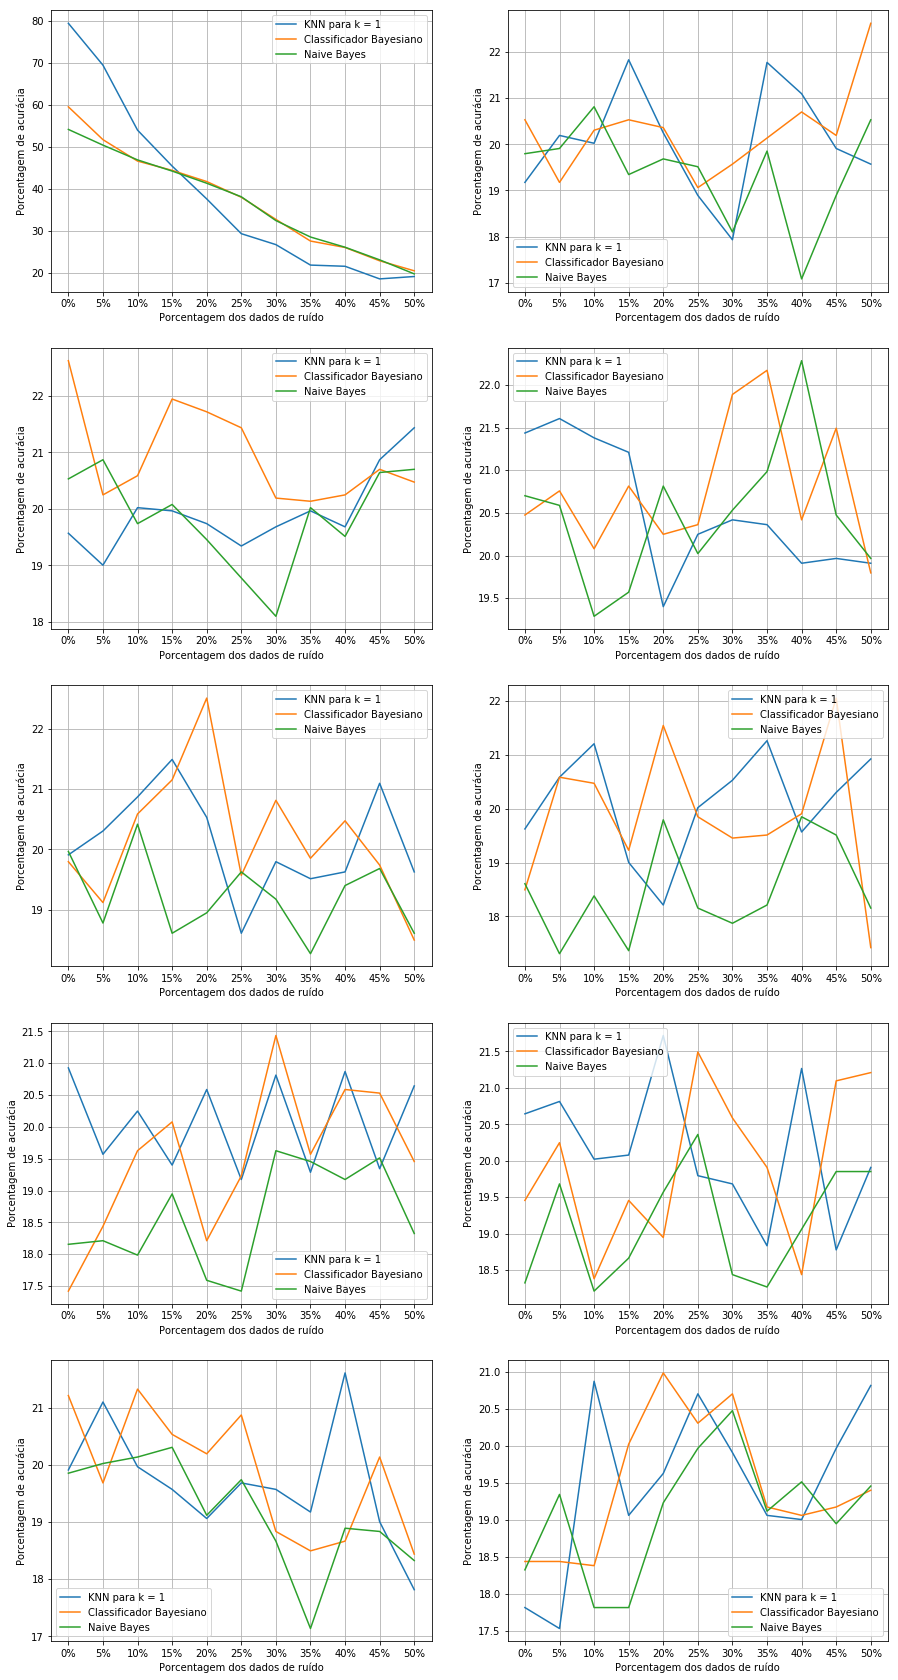

In [47]:
#Configurando matplotlib
fig = plt.figure(figsize=(15,30))

#Plotando os 10 gráficos para cada simulação
for i in range(10):
    px = plot_porcentagens[i]
    ak = acur_knn[i]
    acb = acur_bayesiano[i]
    anb = acur_naive_bayes[i]
    #Inserindo num gráfico a porcentagem x acurácia    
    fig.add_subplot(5, 2, i+1)
    
    plt.xlabel('Porcentagem dos dados de ruído')
    plt.ylabel('Porcentagem de acurácia')
    plt.grid(True)
        
    plt.plot(px, ak, label='KNN para k = 1')
    plt.plot(px, acb, label='Classificador Bayesiano')
    plt.plot(px, anb, label='Naive Bayes')
    plt.legend(loc='best')
    

plt.show(True)

In [48]:
#Média e desvio padrão para cada classificador
print("==== Cálculo de médias e desvio padrão para cada classificador ====\n")
print("\t\t\tMédia\t\tDesvio padrão")
print("KNN com k = 1\t\t%.4f\t\t%.4f" % (np.mean(acur_knn), np.var(acur_knn)))
print("Classificador Bayesiano\t%.4f\t\t%.4f" % (np.mean(acur_bayesiano), np.var(acur_bayesiano)))
print("Naive Bayes\t\t%.4f\t\t%.4f" % (np.mean(acur_naive_bayes), np.var(acur_naive_bayes)))

==== Cálculo de médias e desvio padrão para cada classificador ====

			Média		Desvio padrão
KNN com k = 1		21.8619		71.9876
Classificador Bayesiano	21.8254		42.5987
Naive Bayes		21.0258		40.8619


Analisando os dados listados acima (média, desvio padrão e os gráficos plotados), podemos ver que o classificador KNN para k = 1 se manteve com maior acurácia na maioria das simulações feitas, além de ter média de acurácia maior. Como é um algoritmo pouco elaborado e considera somente dados próximos ao dado analisado, não há consistência clara na média, concretizado pelo seu maior desvio padrão em relação aos dois outros classificadores.

Caso fosse necessário escolher um algoritmo de classificação, a melhor escolha seria o Classificador Bayesiano, porque sua média de acurácia é muito próxima ao do melhor classificador (no caso, KNN com k = 1) e seu desvio padrão é o menor entre os três algoritmos analisados, o que indica maior consistência na classificação do dataset.

## 8 –No caso do classificador Naive Bayes, é possível considerar diferentes funções para estimar as probabilidades. Compare os casos: (i) Gaussian Naive Bayes, (ii) multinomial Naive Bayese (iii)Bernoulli Naive Bayes. Considere os casos com e sem normalização.

In [32]:
from sklearn.naive_bayes import MultinomialNB
def acuraciaMultinomialNaiveBayesValor(features, tipo=0, p=0.7): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    
    X = np.array(features, dtype=float)
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização" 
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    mnb = MultinomialNB()
    mnb.fit(train_x, train_y)
    pred_y = mnb.predict(test_x)
    score_MNB = accuracy_score(pred_y, test_y)
    return score

In [33]:
from sklearn.naive_bayes import BernoulliNB
def acuraciaBernoulliNaiveBayesValor(features, tipo=0, p=0.7): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    
    X = np.array(features, dtype=float)
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização" 
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    bnb = BernoulliNB()
    bnb.fit(train_x, train_y)
    pred_y = bnb.predict(test_x)
    score_BNB = accuracy_score(pred_y, test_y)
    return score

In [34]:
def acuraciaMultinomialNaiveBayesValor(features, tipo=0, p=0.7): #tipo: 0 sem processamento, 1 com padronização, 2 com normalização
    legend = "sem processamento"
    
    X = np.array(features, dtype=float)
    if tipo == 1:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        legend = "com padronização"
    
    if tipo == 2:
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X)
        X = scaler.transform(X)
        legend = "com normalização" 
    
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
    mnb = MultinomialNB()
    mnb.fit(train_x, train_y)
    pred_y = mnb.predict(test_x)
    score_MNB = accuracy_score(pred_y, test_y)
    return score

In [35]:
print("Acurácias para o Naive Bayes sem padronização:\n")
print("\tGaussian Naive Bayes: \t%.4f" % acuraciaNaiveBayesValor(features, tipo=0, p=0.7))
print("\tMultinomial Naive Bayes: %.4f" % acuraciaMultinomialNaiveBayesValor(features, tipo=0, p=0.7))
print("\tBernoulli Naive Bayes: \t%.4f"% acuraciaBernoulliNaiveBayesValor(features, tipo=0, p=0.7))

Acurácias para o Naive Bayes sem padronização:

	Gaussian Naive Bayes: 	0.5413
	Multinomial Naive Bayes: 0.6867
	Bernoulli Naive Bayes: 	0.6867


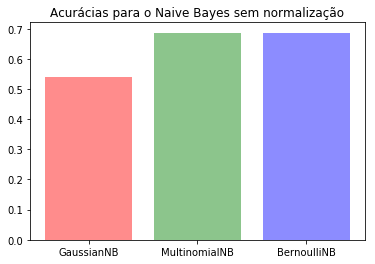

In [36]:
acur_aux = [acuraciaNaiveBayesValor(features, tipo=0, p=0.7), acuraciaMultinomialNaiveBayesValor(features, tipo=0, p=0.7), acuraciaBernoulliNaiveBayesValor(features, tipo=0, p=0.7)]
numbers = np.arange(0, len(acur_aux))
plt.bar(numbers, acur_aux, alpha=.45, color=['red', 'green', 'blue'])
classificadores = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
plt.xticks(numbers, classificadores)
plt.title('Acurácias para o Naive Bayes sem normalização')
plt.show(True)

In [37]:
print("Acurácias para o Naive Bayes com padronização:\n")
print("\tGaussian Naive Bayes: \t%.4f" % acuraciaNaiveBayesValor(features, tipo=2, p=0.7))
print("\tMultinomial Naive Bayes: %.4f" % acuraciaMultinomialNaiveBayesValor(features, tipo=2, p=0.7))
print("\tBernoulli Naive Bayes: \t%.4f"% acuraciaBernoulliNaiveBayesValor(features, tipo=2, p=0.7))

Acurácias para o Naive Bayes com padronização:

	Gaussian Naive Bayes: 	0.5413
	Multinomial Naive Bayes: 0.6867
	Bernoulli Naive Bayes: 	0.6867


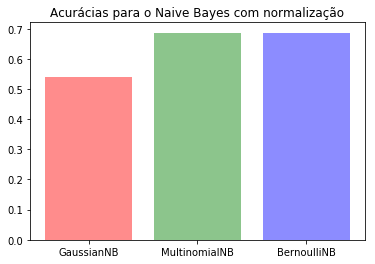

In [38]:
acur_aux = [acuraciaNaiveBayesValor(features, tipo=2, p=0.7), acuraciaMultinomialNaiveBayesValor(features, tipo=2, p=0.7), acuraciaBernoulliNaiveBayesValor(features, tipo=2, p=0.7)]
numbers = np.arange(0, len(acur_aux))
plt.bar(numbers, acur_aux, alpha=.45, color=['red', 'green', 'blue'])
classificadores = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
plt.xticks(numbers, classificadores)
plt.title('Acurácias para o Naive Bayes com normalização')
plt.show(True)

## 9 –No caso do Knn, compare as classificações usando diferentes métricas. Varie k e mostre as curvas (em um mesmo plot) para as distâncias euclidiana, Manhattan, Chebyshev e Minkowski (p=1.5, p = 3).

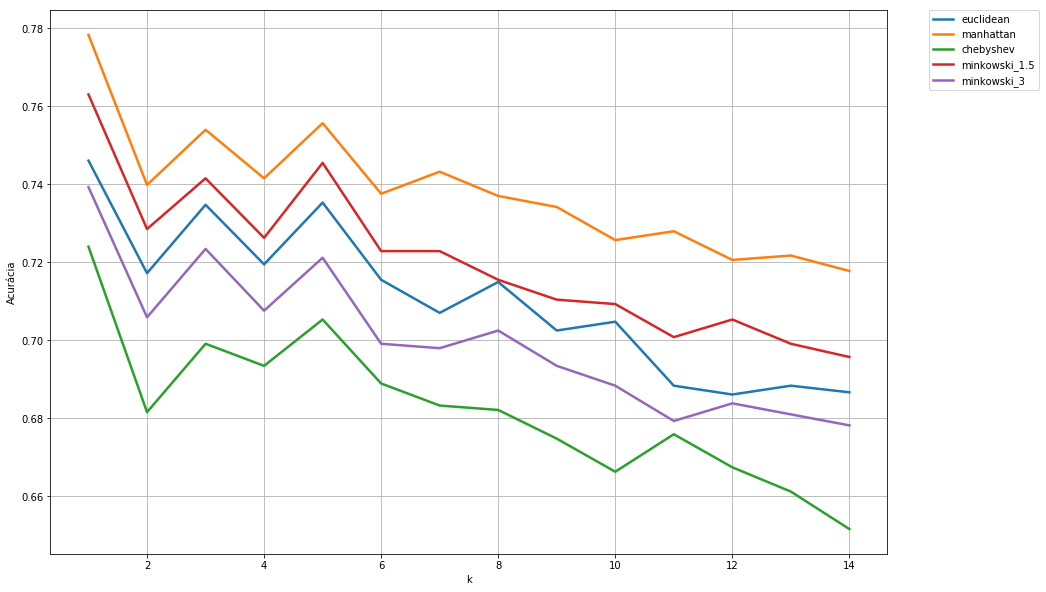

In [39]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel("k")
plt.ylabel("Acurácia")

dists = ['euclidean', 'manhattan', 'chebyshev']
for m in dists:
    acur = []
    k_list = []
    for k in range(1, 15):
        acur.append(acuraciaKnnValor(features, tipo=0, p=0.7, metric=m, k=k))
        k_list.append(k)
    plt.plot(k_list, acur, label=m, linewidth=2.5)

p_list = [1.5, 3]
for p_valor in p_list:
    acur = []
    k_list = []
    for k in range(1, 15):
        acur.append(acuraciaKnnValor(features, tipo=0, p=0.7, metric='minkowski', k=k, dist=p_valor))
        k_list.append(k)
    plt.plot(k_list, acur, label='minkowski_'+str(p_valor), linewidth=2.5)    
    

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 10	– Faça	um	gráfico	da	fração	de	elementos	no	conjunto	de	treinamento	(10%	até	90%	em	passos	de	10%)	versus	acurácia	para	os	classificadores:
- ### knn	(melhor	k	observado	anteriormente)
- ### Naive	Bayes
- ### Decisão	Bayesiana
## Considere os	casos com e sem padronização.

### k-vizinhos

Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:


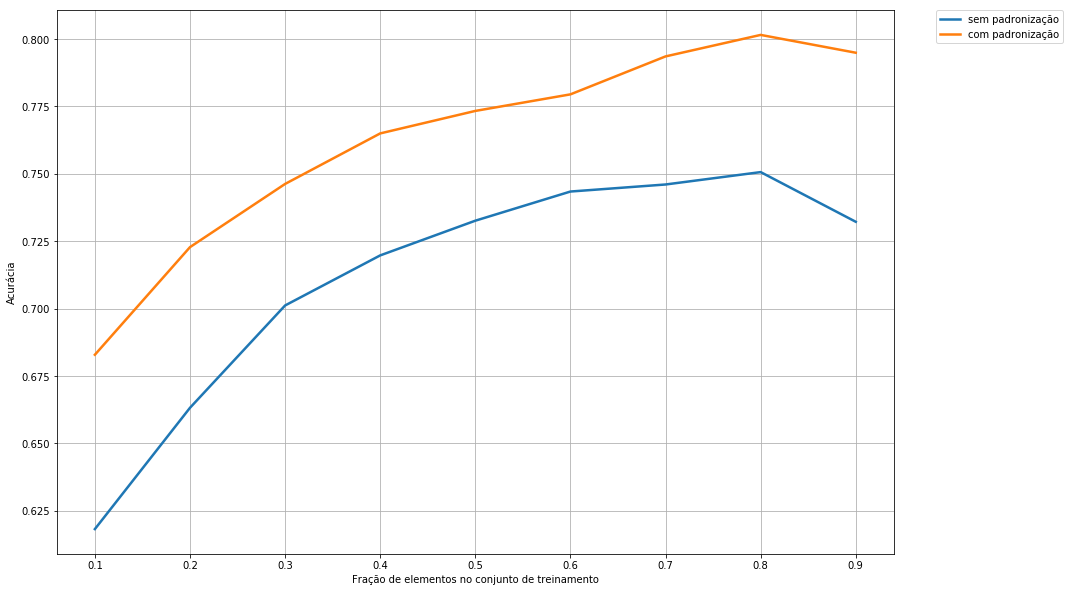

In [40]:
acuracia_sem = []
acuracia_com = []
list_p = []
for i in range(1, 10):
    list_p.append(i/10)
    acuracia_sem.append(acuraciaKnnValor(features, tipo=0, p=i/10, k=1))
    acuracia_com.append(acuraciaKnnValor(features, tipo=1, p=i/10, k=1))

print("Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:")
plt.figure(figsize=(15,10))
plt.xlabel("Fração de elementos no conjunto de treinamento")
plt.ylabel("Acurácia")
plt.plot(list_p, acuracia_sem, label = 'sem padronização', linewidth=2.5)
plt.plot(list_p, acuracia_com, label = 'com padronização', linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)


### Classificador bayesiano

Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:


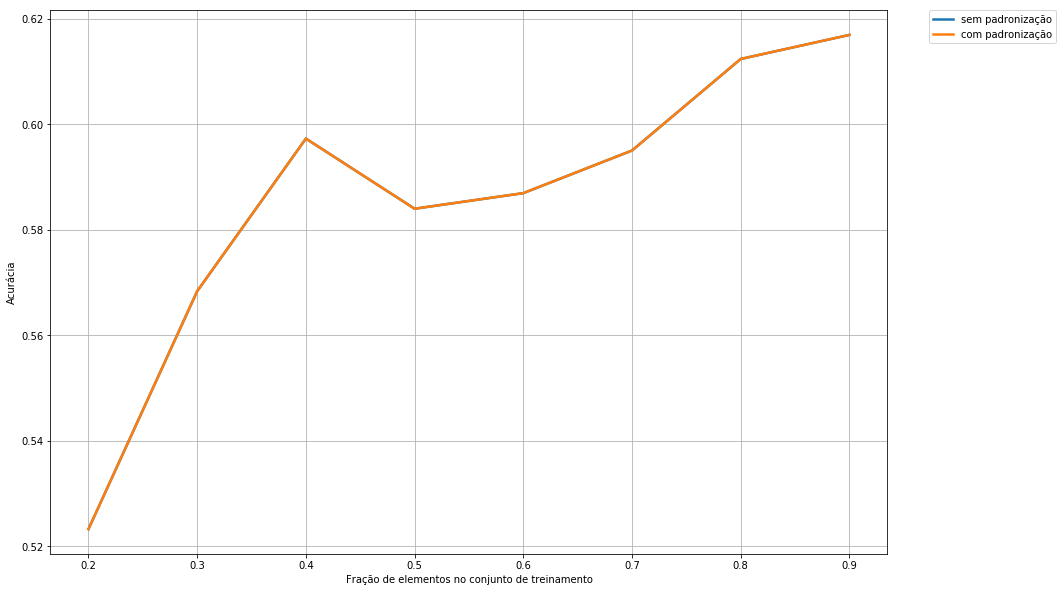

In [41]:
acuracia_sem = []
acuracia_com = []
list_p = []
#não funciona com 10% pois a matriz não é singular e dá erro com o método pdf
for i in range(2, 10):
    list_p.append(i/10)
    acuracia_sem.append(acuraciaBayesValor(features=features, tipo=0, p=i/10))
    acuracia_com.append(acuraciaBayesValor(features=features, tipo=1, p=i/10))
    
print("Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:")
plt.figure(figsize=(15,10))
plt.xlabel("Fração de elementos no conjunto de treinamento")
plt.ylabel("Acurácia")
plt.plot(list_p, acuracia_sem, label = 'sem padronização', linewidth=2.5)
plt.plot(list_p, acuracia_com, label = 'com padronização', linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)

### Naive Bayes

Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:


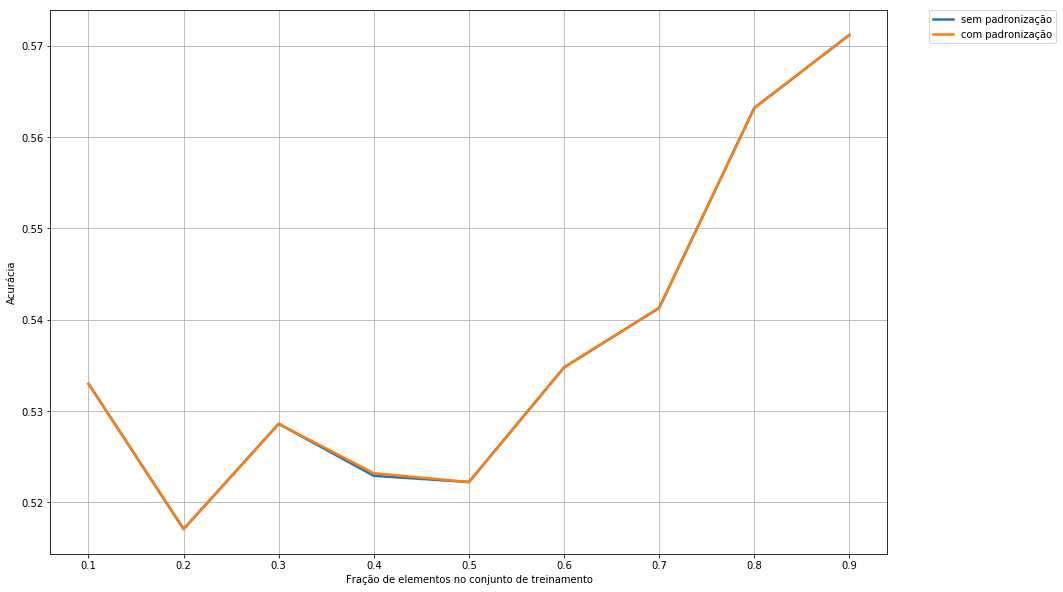

In [42]:
acuracia_sem = []
acuracia_com = []
list_p = []
for i in range(1, 10):
    list_p.append(i/10)
    acuracia_sem.append(acuraciaNaiveBayesValor(features=features, tipo=0, p=i/10))
    acuracia_com.append(acuraciaNaiveBayesValor(features=features, tipo=1, p=i/10))
    
print("Gráfico da acurácia em função da fração de elementos no conjunto de treinamento:")
plt.figure(figsize=(15,10))
plt.xlabel("Fração de elementos no conjunto de treinamento")
plt.ylabel("Acurácia")
plt.plot(list_p, acuracia_sem, label = 'sem padronização', linewidth=2.5)
plt.plot(list_p, acuracia_com, label = 'com padronização', linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)